In [23]:
"""
EDA of training/validation set 

take care of outliers

put large values in millions of dollars

add new accounting ratio calculations

subset to features to include in model evaluation

"""

'\nEDA of training/validation set \n\n'

In [1]:
import pandas as pd
import numpy as np
import datetime
import pickle

In [2]:
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

plt.rcParams['figure.figsize'] = (3, 3)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [3]:
# the df with features and target

#with open('model_data.pickle', 'rb') as read_file:

with open('training_data.pickle', 'rb') as read_file:
    training_data = pickle.load(read_file)
    
training_data.head()

,company_name,period_end_date,number_of_quarters,submission_number,central_index_key,ein,sic,fiscal_year_end,fiscal_year,form,...,WorkingCapital,Revenue_any,Industry,div_code,Division,FULL_NAME,bankruptcy_date,time_delta,days,target
0,1 800 FLOWERS COM INC,2014-06-30,0,0001437749-17-015969,1084869,113117311,5990,630,2017,10-K,...,NaN,7.563450e+08,"Retail-Retail Stores, NEC",59,Retail Trade,NaN,NaT,NaT,NaN,0
1,1 800 FLOWERS COM INC,2015-06-30,0,0001437749-18-017027,1084869,113117311,5990,630,2018,10-K,...,NaN,1.121506e+09,"Retail-Retail Stores, NEC",59,Retail Trade,NaN,NaT,NaT,NaN,0
2,1 800 FLOWERS COM INC,2016-06-30,0,0001437749-19-018360,1084869,113117311,5990,630,2019,10-K,...,NaN,1.173024e+09,"Retail-Retail Stores, NEC",59,Retail Trade,NaN,NaT,NaT,NaN,0
3,1 800 FLOWERS COM INC,2017-06-30,4,0001437749-19-018360,1084869,113117311,5990,630,2019,10-K,...,NaN,1.193625e+09,"Retail-Retail Stores, NEC",59,Retail Trade,NaN,NaT,NaT,NaN,0
4,1 800 FLOWERS COM INC,2018-06-30,4,0001437749-19-018360,1084869,113117311,5990,630,2019,10-K,...,NaN,1.151921e+09,"Retail-Retail Stores, NEC",59,Retail Trade,NaN,NaT,NaT,NaN,0


In [4]:
training_data.shape

(19919, 58)

In [38]:
training_data.columns

Index(['company_name', 'period_end_date', 'number_of_quarters',
       'submission_number', 'central_index_key', 'ein', 'sic',
       'fiscal_year_end', 'fiscal_year', 'form', 'date_filed', 'Assets',
       'AssetsCurrent', 'CashAndCashEquivalentsAtCarryingValue',
       'CashAndCashEquivalentsPeriodIncreaseDecrease', 'CommonStockValue',
       'CostsAndExpenses', 'DeferredIncomeTaxExpenseBenefit',
       'DeferredIncomeTaxLiabilities', 'DeferredIncomeTaxLiabilitiesNet',
       'DeferredIncomeTaxesAndTaxCredits', 'Depreciation',
       'EarningsPerShareBasic', 'EarningsPerShareDiluted', 'Goodwill',
       'GrossProfit', 'IncreaseDecreaseInInventories', 'InterestExpense',
       'InventoryNet', 'Liabilities', 'LiabilitiesAndStockholdersEquity',
       'LiabilitiesCurrent', 'LongTermDebt', 'LongTermDebtCurrent',
       'LongTermDebtMaturitiesRepaymentsOfPrincipalInNextTwelveMonths',
       'LongTermDebtNoncurrent', 'NetCashProvidedByUsedInFinancingActivities',
       'NetCashProvidedByUs

In [5]:
training_data[training_data['target'] ==0].describe()

,number_of_quarters,fiscal_year_end,fiscal_year,Assets,AssetsCurrent,CashAndCashEquivalentsAtCarryingValue,CashAndCashEquivalentsPeriodIncreaseDecrease,CommonStockValue,CostsAndExpenses,DeferredIncomeTaxExpenseBenefit,...,RepaymentsOfLongTermDebt,Revenues,SalesRevenueGoodsNet,SalesRevenueNet,StockholdersEquity,WorkingCapital,Revenue_any,time_delta,days,target
count,19681.000000,19681.000000,1.968100e+04,1.968100e+04,1.370500e+04,1.845100e+04,1.591600e+04,1.522700e+04,5.154000e+03,1.591900e+04,...,7.267000e+03,9.562000e+03,3.046000e+03,5.211000e+03,1.913100e+04,1.060000e+02,1.405100e+04,428,428.000000,19681.0
mean,2.862456,1111.058381,3.887264e+04,1.411052e+10,2.025637e+09,6.836751e+08,1.346433e+07,1.487967e+08,5.147570e+09,-1.173900e+07,...,7.463731e+08,5.443464e+09,3.854174e+09,5.874067e+09,2.723665e+09,6.102072e+07,5.217313e+09,992 days 01:27:28.598130848,992.060748,0.0
std,1.804532,283.618139,8.609667e+05,1.004471e+11,7.103879e+09,7.113379e+09,1.690492e+09,9.898610e+08,1.821978e+10,5.886154e+08,...,3.128753e+09,2.166678e+10,1.019485e+10,2.317621e+10,1.214746e+10,1.533406e+08,1.942041e+10,780 days 17:29:31.347598008,780.728835,0.0
min,0.000000,131.000000,1.218000e+03,1.000230e+08,6.500000e+03,-3.300000e+07,-1.525110e+11,0.000000e+00,-3.374580e+08,-3.259000e+10,...,-3.000000e+08,-1.269295e+09,-2.321800e+07,-4.371730e+08,-2.506100e+10,-7.790000e+07,-1.269295e+09,-1729 days +00:00:00,-1729.000000,0.0
25%,0.000000,1231.000000,2.017000e+03,4.666410e+08,1.566440e+08,2.600600e+07,-1.939250e+07,7.000000e+04,2.529830e+08,-6.600000e+06,...,3.793500e+06,2.129825e+08,1.820488e+08,3.967050e+08,1.342755e+08,1.000000e+06,2.663120e+08,750 days 00:00:00,750.000000,0.0
50%,4.000000,1231.000000,2.018000e+03,1.550385e+09,4.018510e+08,8.293600e+07,1.000000e+06,6.070000e+05,8.213835e+08,0.000000e+00,...,4.872400e+07,8.097540e+08,7.709285e+08,1.199390e+09,4.522640e+08,1.490148e+07,9.233320e+08,1064 days 12:00:00,1064.500000,0.0
75%,4.000000,1231.000000,2.018000e+03,5.562631e+09,1.270266e+09,2.757570e+08,3.058500e+07,6.331000e+06,2.810431e+09,6.996000e+06,...,4.003980e+08,3.013154e+09,3.093956e+09,3.596184e+09,1.573753e+09,8.110325e+07,3.151918e+09,1510 days 06:00:00,1510.250000,0.0
max,4.000000,1231.000000,2.015103e+07,3.418318e+12,1.696620e+11,4.313040e+11,4.471000e+10,3.009687e+10,3.603090e+11,2.487700e+10,...,8.080200e+10,5.003430e+11,1.226620e+11,4.957610e+11,3.487030e+11,1.300000e+09,5.003430e+11,2385 days 00:00:00,2385.000000,0.0


In [6]:
training_data[training_data['target'] ==1].describe()

,number_of_quarters,fiscal_year_end,fiscal_year,Assets,AssetsCurrent,CashAndCashEquivalentsAtCarryingValue,CashAndCashEquivalentsPeriodIncreaseDecrease,CommonStockValue,CostsAndExpenses,DeferredIncomeTaxExpenseBenefit,...,RepaymentsOfLongTermDebt,Revenues,SalesRevenueGoodsNet,SalesRevenueNet,StockholdersEquity,WorkingCapital,Revenue_any,time_delta,days,target
count,238.000000,238.000000,2.380000e+02,2.380000e+02,2.260000e+02,2.280000e+02,1.740000e+02,1.850000e+02,1.160000e+02,1.840000e+02,...,1.030000e+02,1.230000e+02,2.700000e+01,4.500000e+01,2.240000e+02,0.0,1.660000e+02,238,238.000000,238.0
mean,3.613445,1143.584034,1.713343e+05,3.568909e+09,6.235733e+08,1.731829e+08,1.839257e+06,1.975637e+08,1.745507e+09,-4.571070e+07,...,4.429354e+08,1.659634e+09,1.448879e+09,2.020185e+09,8.168058e+07,NaN,1.729192e+09,221 days 17:44:52.436974788,221.739496,1.0
std,1.184351,277.480496,1.843138e+06,7.587116e+09,1.009603e+09,3.226916e+08,2.260739e+08,1.387480e+09,2.458110e+09,2.082893e+08,...,7.681862e+08,2.511902e+09,2.565885e+09,3.201163e+09,2.270843e+09,NaN,2.702361e+09,259 days 01:13:34.257048612,259.051091,0.0
min,0.000000,131.000000,2.014000e+03,2.017570e+08,1.622500e+07,0.000000e+00,-1.493000e+09,0.000000e+00,-3.374580e+08,-2.402000e+09,...,0.000000e+00,0.000000e+00,2.198300e+07,8.389700e+07,-1.847400e+10,NaN,0.000000e+00,-522 days +00:00:00,-522.000000,1.0
25%,4.000000,1231.000000,2.015000e+03,7.339670e+08,1.301798e+08,1.319550e+07,-2.424625e+07,2.200000e+04,4.852352e+08,-3.076300e+07,...,8.450000e+06,3.513685e+08,2.020185e+08,3.566990e+08,-2.898045e+08,NaN,3.570565e+08,56 days 00:00:00,56.000000,1.0
50%,4.000000,1231.000000,2.017000e+03,1.477819e+09,2.809045e+08,4.927950e+07,-3.635000e+05,2.960000e+05,9.072610e+08,-2.217000e+06,...,1.063660e+08,6.589400e+08,7.975550e+08,7.941830e+08,6.794250e+07,NaN,6.859605e+08,280 days 00:00:00,280.000000,1.0
75%,4.000000,1231.000000,2.018000e+03,2.900502e+09,6.563698e+08,1.923390e+08,2.415325e+07,1.000000e+06,1.798864e+09,7.282500e+05,...,4.883085e+08,1.468695e+09,1.457664e+09,1.838663e+09,4.453048e+08,NaN,1.568280e+09,439 days 12:00:00,439.500000,1.0
max,4.000000,1231.000000,2.015093e+07,7.699500e+10,9.195000e+09,2.806000e+09,1.097000e+09,1.291000e+10,1.713200e+10,4.412000e+08,...,4.811124e+09,1.713500e+10,1.340900e+10,1.670200e+10,1.922000e+10,NaN,1.713500e+10,547 days 00:00:00,547.000000,1.0


In [7]:
training_data[['company_name', 'period_end_date', 'EarningsPerShareBasic', 'EarningsPerShareDiluted']].sort_values(by='EarningsPerShareBasic', ascending=True)[:5]


,company_name,period_end_date,EarningsPerShareBasic,EarningsPerShareDiluted
7045,FIRST DATA CORP,2014-12-31,-458000.00,-458000.00
5751,"E.L.F. BEAUTY, INC.",2015-12-31,-1559.81,-1559.81
13993,PENDRELL CORP,2015-12-31,-412.79,-412.79
10152,"JONES ENERGY, INC.",2018-12-31,-271.94,-271.94
16988,STONE ENERGY CORP,2015-12-31,-197.45,-197.45


In [8]:
# queried SEC website for FIRST DATA CORP 10-K for end 2014-12-31
# EPS -458000.00
# is not in their 10-K, will remove these extreme values

training_data.loc[training_data['company_name'] == 'FIRST DATA CORP', 'EarningsPerShareBasic'] = np.nan

training_data.loc[training_data['company_name'] == 'FIRST DATA CORP', 'EarningsPerShareDiluted'] = np.nan

In [9]:
training_data[['company_name', 'period_end_date', 'EarningsPerShareBasic', 'EarningsPerShareDiluted']].sort_values(by='EarningsPerShareBasic', ascending=False)[:5]

,company_name,period_end_date,EarningsPerShareBasic,EarningsPerShareDiluted
12122,MOMENTIVE PERFORMANCE MATERIALS INC.,2014-12-31,16850000.00,16850000.00
16595,"SOUTHWEST IOWA RENEWABLE ENERGY, LLC",2014-09-30,3681.03,2080.08
16596,"SOUTHWEST IOWA RENEWABLE ENERGY, LLC",2015-09-30,1032.57,922.33
16598,"SOUTHWEST IOWA RENEWABLE ENERGY, LLC",2017-09-30,1008.85,906.28
6991,"FIRST BANKS, INC",2014-12-31,915.24,788.38


In [10]:
# couple extreme high and lows of EarningsPerShareBasic and EarningsPerShareDiluted

# queried SEC website for MOMENTIVE PERFORMANCE MATERIALS INC. 10-K for end 2014-12-31
# EPS 16850000.00
# is not in their 10-K, will remove these extreme values

training_data.loc[training_data['company_name'] == 'MOMENTIVE PERFORMANCE MATERIALS INC.', 'EarningsPerShareBasic'] = np.nan

training_data.loc[training_data['company_name'] == 'MOMENTIVE PERFORMANCE MATERIALS INC.', 'EarningsPerShareDiluted'] = np.nan

In [11]:
# lowest EPS where bankruptcies
training_data[['company_name', 'period_end_date', 'EarningsPerShareBasic', 'EarningsPerShareDiluted']][training_data['target'] ==1].sort_values(by='EarningsPerShareBasic')[:5]

,company_name,period_end_date,EarningsPerShareBasic,EarningsPerShareDiluted
10152,"JONES ENERGY, INC.",2018-12-31,-271.94,-271.94
16988,STONE ENERGY CORP,2015-12-31,-197.45,-197.45
13970,PEABODY ENERGY CORP,2015-12-31,-108.29,-108.29
16989,STONE ENERGY CORP,2016-12-31,-105.63,-105.63
15018,RAIT FINANCIAL TRUST,2018-12-31,-72.37,-72.37


In [12]:
# highest EPS where bankruptcies

training_data[['company_name', 'period_end_date', 'EarningsPerShareBasic', 'EarningsPerShareDiluted']][training_data['target'] ==1].sort_values(by='EarningsPerShareBasic', ascending=False)[:5]

,company_name,period_end_date,EarningsPerShareBasic,EarningsPerShareDiluted
3046,CAESARS ENTERTAINMENT CORP,2015-12-31,41.49,40.87
3674,"CENVEO, INC",2016-12-31,7.97,7.32
15273,"RENTECH, INC.",2016-12-31,6.61,6.61
19499,WHITING PETROLEUM CORP,2018-12-31,3.77,3.73
8432,HALCON RESOURCES CORP,2017-12-31,3.67,3.65


In [ ]:
#######################################

In [13]:
# put large dollar amounts in millions
# ease of plotting graphs
# move decimal place as model will take large numbers

training_data['Assets_MM'] = training_data['Assets'] / 1e6
training_data['AssetsCurrent_MM'] = training_data['AssetsCurrent'] / 1e6
training_data['Libilities_MM'] = training_data['Liabilities'] / 1e6
training_data['LibilitiesCurrent_MM'] = training_data['LiabilitiesCurrent'] / 1e6
training_data['NetIncomeLoss_MM'] = training_data['NetIncomeLoss'] / 1e6
training_data['StockholdersEquity_MM'] = training_data['StockholdersEquity'] / 1e6
training_data['OperatingIncomeLoss_MM'] = training_data['OperatingIncomeLoss'] / 1e6
training_data['Revenues_MM'] = training_data['Revenues'] / 1e6


training_data['CashAndCashEquivalentsAtCarryingValue_MM'] = training_data['CashAndCashEquivalentsAtCarryingValue'] / 1e6
training_data['CommonStockValue_MM'] = training_data['CommonStockValue'] / 1e6
training_data['Goodwill_MM'] = training_data['Goodwill'] / 1e6
training_data['GrossProfit_MM'] = training_data['GrossProfit'] / 1e6
training_data['InterestExpense_MM'] = training_data['InterestExpense'] / 1e6


training_data['Revenue_any_MM'] = training_data['Revenue_any'] / 1e6
training_data['Revenues_MM'] = training_data['Revenues'] / 1e6
training_data['SalesRevenueGoodsNet_MM'] = training_data['SalesRevenueGoodsNet'] / 1e6
training_data['SalesRevenueNet_MM'] = training_data['SalesRevenueNet'] / 1e6

training_data['NetCashProvidedByUsedInFinancingActivities_MM'] = training_data['NetCashProvidedByUsedInFinancingActivities'] / 1e6
training_data['NetCashProvidedByUsedInInvestingActivities_MM'] = training_data['NetCashProvidedByUsedInInvestingActivities'] / 1e6
training_data['NetCashProvidedByUsedInOperatingActivities_MM'] = training_data['NetCashProvidedByUsedInOperatingActivities'] / 1e6

training_data['LongTermDebtMaturitiesRepaymentsOfPrincipalInNextTwelveMonths_MM'] = training_data['LongTermDebtMaturitiesRepaymentsOfPrincipalInNextTwelveMonths'] / 1e6
training_data['LongTermDebtNoncurrent_MM'] = training_data['LongTermDebtNoncurrent'] / 1e6
training_data['LongTermDebt_MM'] = training_data['LongTermDebt'] / 1e6
training_data['RepaymentsOfLongTermDebt_MM'] = training_data['RepaymentsOfLongTermDebt'] / 1e6

training_data['Depreciation_MM'] = training_data['Depreciation'] / 1e6

In [14]:
# accounting ratios

training_data['debt_ratio'] = training_data['Liabilities'] / training_data['StockholdersEquity']
training_data['debt_equity_ratio'] = training_data['Liabilities'] / training_data['Assets']
training_data['current_ratio'] = training_data['AssetsCurrent'] / training_data['LiabilitiesCurrent']
training_data['leverage'] = training_data['Assets'] / training_data['StockholdersEquity']
training_data['return_on_equity'] = training_data['NetIncomeLoss'] / training_data['StockholdersEquity']
training_data['return_on_assets'] = training_data['NetIncomeLoss'] / training_data['Assets']


training_data['ratio_1'] = training_data['StockholdersEquity'] / training_data['Assets']
training_data['ratio_2'] = training_data['GrossProfit'] / training_data['Assets'] # Gross profitability ratio
training_data['ratio_3'] = training_data['Assets'] / training_data['Liabilities']
training_data['ratio_4'] = (training_data['GrossProfit'] + training_data['Depreciation'] ) /training_data['Liabilities']



In [51]:
training_data.columns

Index(['company_name', 'period_end_date', 'number_of_quarters',
       'submission_number', 'central_index_key', 'ein', 'sic',
       'fiscal_year_end', 'fiscal_year', 'form', 'date_filed', 'Assets',
       'AssetsCurrent', 'CashAndCashEquivalentsAtCarryingValue',
       'CashAndCashEquivalentsPeriodIncreaseDecrease', 'CommonStockValue',
       'CostsAndExpenses', 'DeferredIncomeTaxExpenseBenefit',
       'DeferredIncomeTaxLiabilities', 'DeferredIncomeTaxLiabilitiesNet',
       'DeferredIncomeTaxesAndTaxCredits', 'Depreciation',
       'EarningsPerShareBasic', 'EarningsPerShareDiluted', 'Goodwill',
       'GrossProfit', 'IncreaseDecreaseInInventories', 'InterestExpense',
       'InventoryNet', 'Liabilities', 'LiabilitiesAndStockholdersEquity',
       'LiabilitiesCurrent', 'LongTermDebt', 'LongTermDebtCurrent',
       'LongTermDebtMaturitiesRepaymentsOfPrincipalInNextTwelveMonths',
       'LongTermDebtNoncurrent', 'NetCashProvidedByUsedInFinancingActivities',
       'NetCashProvidedByUs

In [ ]:
# calc how extreme ratio is in relation to norm for the industry ??  or industry division? 

In [ ]:
###########

In [17]:
training_ready = training_data[['company_name', 'FULL_NAME', 'period_end_date',
       'submission_number', 'central_index_key', 'ein', 'sic',
       'fiscal_year_end', 'fiscal_year', 'form', 'date_filed', 'Industry', 'div_code', 'Division', 
       'bankruptcy_date', 'days', 'target', 'Assets_MM',
       'AssetsCurrent_MM', 'Libilities_MM', 'LibilitiesCurrent_MM',
       'NetIncomeLoss_MM', 'StockholdersEquity_MM', 'OperatingIncomeLoss_MM',
       'Revenues_MM', 'CashAndCashEquivalentsAtCarryingValue_MM',
       'CommonStockValue_MM', 'Goodwill_MM', 'GrossProfit_MM',
       'InterestExpense_MM', 'Revenue_any_MM', 'SalesRevenueGoodsNet_MM',
       'SalesRevenueNet_MM', 'NetCashProvidedByUsedInFinancingActivities_MM',
       'NetCashProvidedByUsedInInvestingActivities_MM',
       'NetCashProvidedByUsedInOperatingActivities_MM',
       'LongTermDebtMaturitiesRepaymentsOfPrincipalInNextTwelveMonths_MM',
       'LongTermDebtNoncurrent_MM', 'LongTermDebt_MM',
       'RepaymentsOfLongTermDebt_MM', 'debt_ratio', 'debt_equity_ratio',
       'current_ratio', 'leverage', 'return_on_equity', 'return_on_assets',
       'ratio_1', 'ratio_2', 'ratio_3', 'ratio_4', 'EarningsPerShareBasic', 'EarningsPerShareDiluted']]

In [18]:
# pickle the model_data df

with open('data_model_training.pickle', 'wb') as to_write:
    pickle.dump(training_ready, to_write)

In [ ]:
############################

In [53]:
### plots of all the values to see where firms with bankruptcies differ

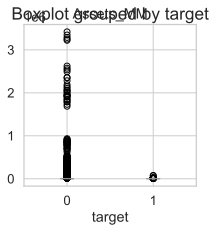

In [61]:
training_ready.boxplot(column='Assets_MM', by='target');


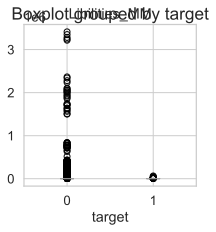

In [62]:
training_ready.boxplot(column='Libilities_MM', by='target');

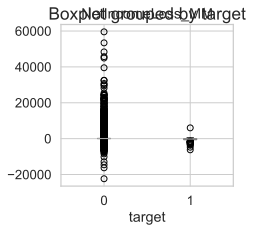

In [63]:
training_ready.boxplot(column='NetIncomeLoss_MM', by='target');

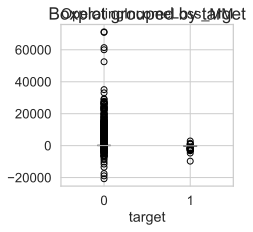

In [64]:
training_ready.boxplot(column='OperatingIncomeLoss_MM', by='target');

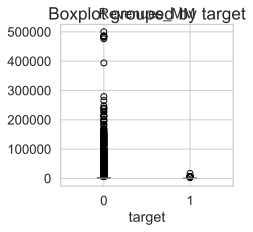

In [65]:
training_ready.boxplot(column='Revenues_MM', by='target');

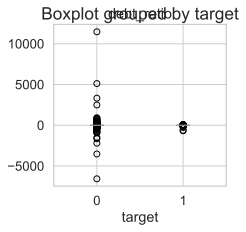

In [66]:
training_ready.boxplot(column='debt_ratio', by='target');

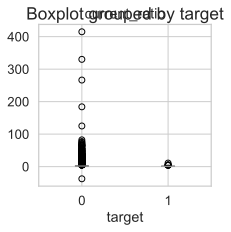

In [67]:
training_ready.boxplot(column='current_ratio', by='target');

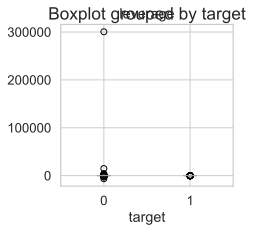

In [68]:

training_ready.boxplot(column='leverage', by='target');

In [70]:
training_ready[['company_name', 'period_end_date', 'leverage']].sort_values(by='leverage', ascending=False)

,company_name,period_end_date,leverage
5130,"CYPRESS ENERGY PARTNERS, L.P.",2014-12-31,inf
17739,TIMKENSTEEL CORP,2015-12-31,inf
15430,RICE MIDSTREAM PARTNERS LP,2017-12-31,inf
10897,LIBERTY OILFIELD SERVICES INC.,2017-12-31,inf
12488,NATIONAL STORAGE AFFILIATES TRUST,2014-12-31,inf
...,...,...,...
19786,YRC WORLDWIDE INC.,2014-12-31,NaN
19787,YRC WORLDWIDE INC.,2015-12-31,NaN
19788,YRC WORLDWIDE INC.,2016-12-31,NaN
19789,YRC WORLDWIDE INC.,2017-12-31,NaN
